## Astir 
see [here](https://www.sciencedirect.com/science/article/pii/S2405471221003355?via%3Dihub) for full publication (Geuenich et al.,2021, Cell Systems).
see [here](https://astir.readthedocs.io/en/latest/index.html) for docs.

#### 1. Load libraries

In [1]:
from astir.data import from_csv_yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
expression_mat_path = "/Volumes/tnbc_volume/TNBC_all/data_analysis/04_astir/expr_TNBC_astir.csv"
yaml_marker_path = "/Volumes/tnbc_volume/TNBC_all/data_analysis/04_astir/markers_TNBC.yml"

In [3]:
!head -n 20 /Volumes/tnbc_volume/TNBC_all/data_analysis/04_astir/markers_TNBC.yml

cell_types:
  Epithelial:
    - panCK
    - Ecad
  T_cell:
    - CD3
    - CD8a
    - CD4
  Macrophages:
    - CD68
  Stroma:
    - SMA
  DC:
    - CD11c
  B_cells:
    - CD20


In [4]:
pd.read_csv(expression_mat_path, index_col=0).head()

,HistoneH3,H3K27me3,CK5,Fibronectin,HLADR,CK8_18,CD15,CD68,KRT14,SMA,...,S6,CD4,CD31_vWF,p_mTOR,CK7,panCK,c_Cas3_PARP,DNA_1,DNA_2,sample
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_1,2.388487,0.388229,0.594285,3.445637,2.014697,0.053462,0.053377,0.102448,0.245146,0.305757,...,0.000000,0.176933,1.143719,0.081050,0.000000,0.780844,0.165439,3.552741,4.036523,ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_2,2.076120,0.573343,0.215219,2.963932,2.100909,0.089582,0.090837,1.133236,0.000000,1.422111,...,0.355477,1.016129,0.862653,0.202576,0.035057,0.180887,0.208371,4.246967,4.858324,ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_3,1.054142,0.147591,0.168793,1.877433,0.631057,0.000000,1.010553,0.027093,0.063786,0.331033,...,0.199942,0.088545,0.883308,0.027567,0.033412,0.021257,0.156560,2.635245,3.172936,ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_4,2.581451,0.968434,0.284043,3.032551,1.829114,0.182226,0.206081,0.579780,0.063227,1.647106,...,0.429638,0.741881,1.015455,0.330299,0.076051,1.422789,0.441109,4.767784,5.319947,ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_5,3.068631,0.738488,0.477367,3.955270,1.200975,0.257755,0.202852,0.507105,0.212499,2.670458,...,0.195364,0.577292,1.483318,0.166349,0.054767,0.100463,1.501023,4.786631,5.358600,ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16


In [5]:
ast = from_csv_yaml(expression_mat_path, marker_yaml=yaml_marker_path)
print(ast)

Astir object, 6 cell types, 1153214 cells


In [6]:
# Number of training epochs
max_epochs = 1000

# Set learning rate
learning_rate = 2e-3

# Set initial epochs
initial_epochs = 3

ast.fit_type(max_epochs = max_epochs,
             learning_rate = learning_rate,
             n_init_epochs = initial_epochs)

training restart (final):   0%|          | 1/1000 [81.62s/epochs, current loss: 6557026.8]


Text(0.5, 0, 'Epoch')

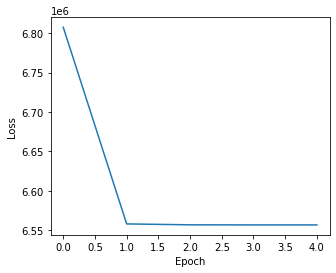

In [7]:
plt.figure(figsize=(5,4))
plt.plot(np.arange(len(ast.get_type_losses())), ast.get_type_losses())
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [8]:
assignments = ast.get_celltype_probabilities()
assignments

,Epithelial,T_cell,Macrophages,Stroma,DC,B_cells,Other
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_1,1.924012e-03,1.794246e-08,8.358282e-08,1.709077e-04,4.987751e-01,3.511086e-11,4.991299e-01
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_2,4.128921e-05,6.116923e-06,5.519929e-01,3.353142e-02,2.070633e-01,1.219441e-14,2.073649e-01
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_3,4.616780e-05,1.500964e-09,2.785637e-08,2.075016e-04,4.998466e-01,4.918003e-15,4.998997e-01
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_4,2.510102e-07,9.999952e-01,6.394595e-10,1.240602e-06,1.644154e-06,1.270814e-15,1.647253e-06
ZTMA174.1_ZTMA174_B05.38162_1_AX1Y1_16_5,2.547458e-06,1.378135e-01,1.231366e-06,8.514001e-01,5.387969e-03,4.091551e-14,5.394674e-03
...,...,...,...,...,...,...,...
ZTMA26_3105_201_BX1Y11_4685,2.137568e-04,7.812216e-07,6.494594e-06,4.659561e-05,5.002423e-01,9.338318e-07,4.994891e-01
ZTMA26_3105_201_BX1Y11_4686,2.420379e-04,1.572846e-05,5.391970e-05,1.172042e-04,4.990626e-01,2.249121e-03,4.982593e-01
ZTMA26_3105_201_BX1Y11_4687,3.512718e-05,2.892249e-06,4.406155e-07,7.305122e-05,5.005729e-01,5.792834e-06,4.993098e-01
ZTMA26_3105_201_BX1Y11_4688,2.348770e-04,1.145525e-04,6.921870e-04,1.123773e-04,4.995076e-01,3.923498e-04,4.989461e-01


<AxesSubplot:>

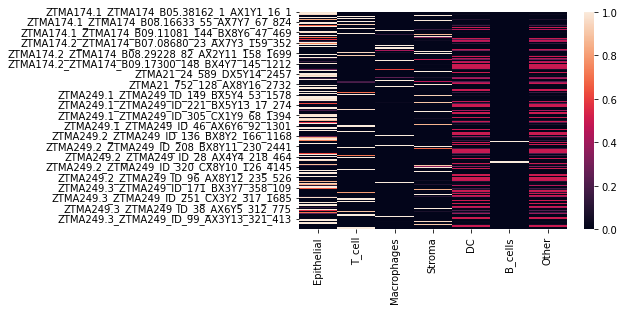

In [9]:
sns.heatmap(assignments)

In [2]:
ast.get_celltypes(threshold=0.5)

NameError: name 'ast' is not defined

In [11]:
ast.diagnostics_celltype(threshold=0.5)

,feature,should be expressed higher in,than,mean cell type 1,mean cell type 2,p-value,note
0,CD11c,DC,Epithelial,0.370832,0.369482,5.343351e-01,None
1,CD11c,DC,T_cell,0.370832,0.463955,2.905491e-244,None
2,CD11c,DC,Macrophages,0.370832,0.702050,0.000000e+00,None
3,CD11c,DC,B_cells,0.370832,0.400022,3.458191e-18,None


In [12]:
ast.type_to_csv(output_csv = "/Volumes/tnbc_volume/TNBC_all/data_analysis/04_astir/cell_types_TNBC.csv", threshold=0.5)